# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import re
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import plotly.express as px
import seaborn as sns


In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 40
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head(10)

,reviews
0,✅ Trip Verified | BA is barely a step above ...
1,Not Verified | Happy with the flight crew. Ha...
2,✅ Trip Verified | Horrible service from boar...
3,Not Verified | My wife and I are very disappo...
4,Not Verified | We flew BA between Heathrow an...
5,Not Verified | Absolutely disgusted with BA. ...
6,Not Verified | Took a trip to Nashville with m...
7,Not Verified | A nightmare journey courtesy o...
8,✅ Trip Verified | Absolutely atrocious. LHR-OR...
9,✅ Trip Verified | As someone who flies relentl...


In [4]:
directory = "data"
file_path = os.path.join(directory, "BA_reviews.csv")

# If data directory doesn't exist then create it.
if not os.path.exists(directory):
    os.makedirs(directory)

df.to_csv(file_path)

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

Step 1: Data Cleaning - Removing unnecessary text, special characters, whitespaces, etc.

In [5]:
def clean_review(review):
    review = re.sub(r'Not Verified \|', '', review)  # Remove "Not Verified |"
    review = re.sub(r'✅ Trip Verified \|', '', review)  # Remove "✅ Trip Verified |"
    review = re.sub(r'✅ Verified Review \|', '', review) # Remove "✅ Verified Review |"
    review = re.sub(r'❎ Unverified \|', '', review) # Remove "❎ Unverified |"
    review = re.sub(r'[^A-Za-z\s]+', '', review) # Removes special characters
    review = review.strip()  # Remove leading and trailing whitespace
    review = review.lower()  # Converting all reviews to lowercase
    return review

# Apply the clean_review function to the 'reviews' column
df['reviews'] = df['reviews'].apply(clean_review)

# Display the first 10 rows of the cleaned dataframe
df["reviews"].head(10)

# Save the cleaned data to a file
df.to_csv("data/cleaned_data.csv", index=False)


In [6]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Load the cleaned data
df = pd.read_csv("data/cleaned_data.csv")

# Topic Modeling
stop_words = set(stopwords.words('english')) 
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

texts = [[word for word in review.split() if word not in stop_words] for review in df['reviews']] # Processes each review by splitting it into individual words and removing any stop words.

dictionary = corpora.Dictionary(texts) # A dictionary is created from the processed words
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000) # Filtering out words that are too rare or too common
corpus = [dictionary.doc2bow(text) for text in texts] 

lda = LdaModel(corpus, num_topics=20, id2word=dictionary, passes=15)

# Print the topics
topics = lda.print_topics(num_words=10)
for topic in topics:
    print(topic)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\katam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\katam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\katam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(0, '0.013*"told" + 0.012*"get" + 0.011*"british" + 0.011*"airways" + 0.010*"would" + 0.010*"us" + 0.009*"customer" + 0.009*"could" + 0.009*"london" + 0.009*"service"')
(1, '0.012*"economy" + 0.012*"staff" + 0.011*"satisfactory" + 0.010*"got" + 0.010*"back" + 0.009*"virgin" + 0.009*"last" + 0.009*"drink" + 0.009*"seats" + 0.009*"food"')
(2, '0.060*"seat" + 0.034*"seats" + 0.018*"check" + 0.017*"british" + 0.017*"airways" + 0.015*"together" + 0.014*"booking" + 0.013*"extra" + 0.013*"paid" + 0.012*"pay"')
(3, '0.022*"good" + 0.020*"lounge" + 0.020*"time" + 0.017*"crew" + 0.017*"boarding" + 0.015*"service" + 0.014*"heathrow" + 0.013*"check" + 0.012*"food" + 0.011*"london"')
(4, '0.020*"first" + 0.020*"class" + 0.015*"food" + 0.012*"service" + 0.011*"staff" + 0.011*"airways" + 0.010*"british" + 0.010*"business" + 0.009*"cabin" + 0.008*"old"')
(5, '0.024*"trolley" + 0.014*"milk" + 0.014*"dubrovnik" + 0.014*"car" + 0.013*"th" + 0.012*"congestion" + 0.012*"bkk" + 0.011*"landed" + 0.011*"crew"

In [7]:
# Download required NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Load the cleaned data
df = pd.read_csv("data/cleaned_data.csv")

# Initialize NLTK tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Add custom irrelevant words
custom_irrelevant_words = {'u', 'had', 'will', 'trip', 'verified', 'review', 'unverified', 'ba'}

# Combine stopwords and custom irrelevant words
all_irrelevant_words = stop_words.union(custom_irrelevant_words)

# Define a function for text preprocessing
def preprocess_text(review):
    # Tokenize the text
    tokens = nltk.word_tokenize(review)
    # Remove stopwords and custom irrelevant words
    tokens = [word for word in tokens if word.lower() not in all_irrelevant_words]
    # Apply lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back to a single string
    return ' '.join(tokens)

# Apply preprocessing to the reviews
df['cleaned_reviews'] = df['reviews'].apply(preprocess_text)

df.head(20)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\katam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\katam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,reviews,cleaned_reviews
0,ba is barely a step above low cost airlines th...,barely step low cost airline try dime nickel e...
1,happy with the flight crew hadnt been on a pla...,happy flight crew hadnt plane year stressed ma...
2,horrible service from boarding to landing i fl...,horrible service boarding landing flew london ...
3,my wife and i are very disappointed with flyin...,wife disappointed flying british airway flight...
4,we flew ba between heathrow and berlin one way...,flew heathrow berlin one way connection experi...
5,absolutely disgusted with ba our flights were ...,absolutely disgusted flight cancelled may even...
6,took a trip to nashville with my wife for a le...,took nashville wife leisure break arrived dire...
7,a nightmare journey courtesy of british airway...,nightmare journey courtesy british airway wors...
8,absolutely atrocious lhrordlhr roundtrip briti...,absolutely atrocious lhrordlhr roundtrip briti...
9,as someone who flies relentlessly with british...,someone fly relentlessly british airway busine...


In [8]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Load the cleaned data
df = pd.read_csv("data/cleaned_data.csv")

# Function to classify sentiment
def get_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
df['Sentiment'] = df['reviews'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['Sentiment_Label'] = df['Sentiment'].apply(get_sentiment)

# Save the updated dataframe with sentiment analysis to a new CSV file
df.to_csv("data/cleaned_reviews_with_sentiment.csv", index=False)

# Display the first few rows of the dataframe to check the sentiment analysis results
df.head(15)


,reviews,Sentiment,Sentiment_Label
0,ba is barely a step above low cost airlines th...,-0.7650,Negative
1,happy with the flight crew hadnt been on a pla...,0.9100,Positive
2,horrible service from boarding to landing i fl...,-0.9246,Negative
3,my wife and i are very disappointed with flyin...,-0.8265,Negative
4,we flew ba between heathrow and berlin one way...,0.9811,Positive
5,absolutely disgusted with ba our flights were ...,-0.7047,Negative
6,took a trip to nashville with my wife for a le...,0.9369,Positive
7,a nightmare journey courtesy of british airway...,-0.8406,Negative
8,absolutely atrocious lhrordlhr roundtrip briti...,-0.9600,Negative
9,as someone who flies relentlessly with british...,0.7269,Positive


In [9]:
import plotly.express as px

# Calculate the total counts for each sentiment label
sentiment_counts = df['Sentiment_Label'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment_Label', 'Count']

# Creating a bar chart using plotly
fig = px.bar(sentiment_counts, x='Sentiment_Label', y='Count', title="Sentiment Analysis of Reviews", 
             labels={'Sentiment_Label': 'Sentiment', 'Count': 'Count'}, color='Sentiment_Label')
fig.show() # Displays the figure

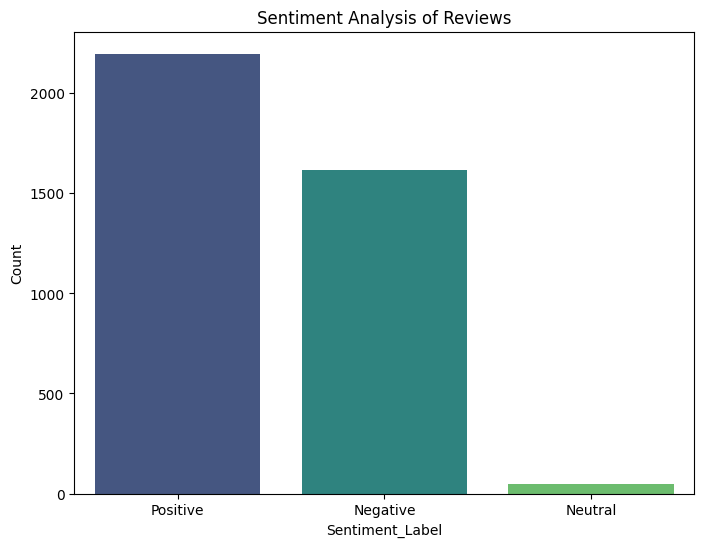

In [10]:
sentiment_counts = df['Sentiment_Label'].value_counts() # Calculates the total counts for each sentiment label
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Sentiment Analysis of Reviews")
plt.xlabel("Sentiment_Label")
plt.ylabel("Count")
plt.show() 

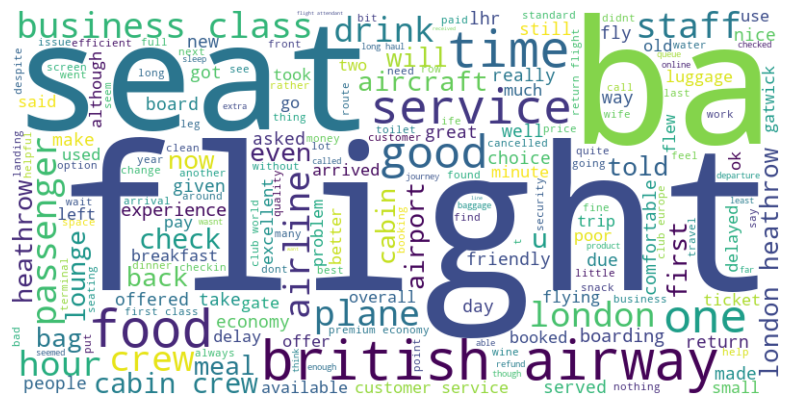

In [11]:
# Word Cloud
text = ' '.join(df['reviews'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()